<h1>Wisconsin Diagnostic Breast Cancer (WDBC)</h1>
<br>
<br>
<h3>Source Information:</h3>
<br>
<p style="font-size:18px">Creators:<br>
<br>
Dr. William H. Wolberg, General Surgery Dept., University of Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu<br>
<br>
W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619<br>
<br>
Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu<br>
<br>
Donor: Nick Street<br>
<br>
Date: November 1995</p>
<br>
<h3>Data Set Information:</h3>
<br>
<p style="font-size:18px">Each record represents follow-up data for one breast cancer case. These are consecutive patients seen by Dr. Wolberg since 1984, and include only those cases exhibiting invasive breast cancer and no evidence of distant metastases at the time of diagnosis.<br>
<br>
Breast cancer is cancer that forms in the cells of the breasts. After skin cancer, breast cancer is the most common cancer diagnosed in women in the United States. Breast cancer can occur in both men and women, but it's far more common in women.<br>
<br>
Substantial support for breast cancer awareness and research funding has helped created advances in the diagnosis and treatment of breast cancer. Breast cancer survival rates have increased, and the number of deaths associated with this disease is steadily declining, largely due to factors such as earlier detection, a new personalized approach to treatment and a better understanding of the disease.(<a href>https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470)</a>
<br>
<h3>Attribute information:</h3>
<br>
<p style="font-size:18px">1) ID number<br>
2) Diagnosis (M = malignant, B = benign)<br>
3-32)<br>
<br>
<h3>Ten real-valued features are computed for each cell nucleus:</h3>
<br>
a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br>
<br>
<h3>The aim of this tutorial: </h3>
<p style="font-size:18px">The Support Vector Machines algorithm is one of the most powerful. The MiMaxScaler also has its special features compared to RobustScaler or StandardScaler. I will use support vector machines for this data set and improve the model with the help of MinMaxScaler and see what effect the application has on the model. And the second: the data set belongs to the higher dimensioned data sets. To fully map this amount of data, I will use a histogram of all features and the PCA to capture the most important relationships.</p>
<h3>Source:</h3> 
<p style="font-size:18px">This database is available through the UW CS ftp server and on the UCI Machine Learning Repository: <a href>https://archive.ics.uci.edu</a>

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mglearn as mgl

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

In [4]:
dataset = read_csv(url, header=None)

In [5]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

<p style="font-size:18px">Dataset has 569 entries and consists of 32 columns. Dataset hasn't any null values or missing data.</p>

In [7]:
dataset.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<br>
<h2>Exploratory Analysis</h2>

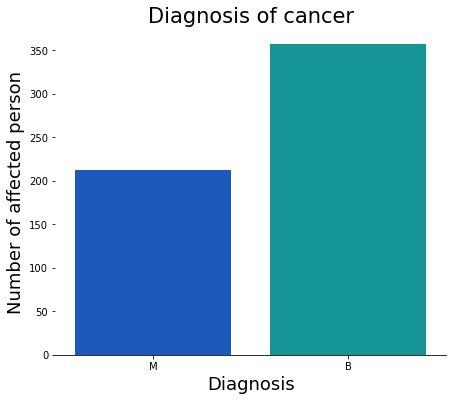

In [8]:
ax=sns.countplot(data=dataset, x=1, palette="winter")
ax.set_title("Diagnosis of cancer", fontsize=21)
ax.set_xlabel("Diagnosis", fontsize=18)
ax.set_ylabel("Number of affected person", fontsize=18)
fig=plt.gcf()
fig.set_size_inches(7,6)
sns.despine(left=True)

In [9]:
dataset[1].value_counts() 

B    357
M    212
Name: 1, dtype: int64

<p style="font-size:18px">Distribution Class: diagnosis "Benign" has 357 patients and "Malignant" 212 patients.<7p>

In [10]:
dataset.drop([0], axis=1, inplace=True)  # The Column Index will not be needed for the work. So i drop it.

In [11]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4D315CD30>,
      dtype=object)

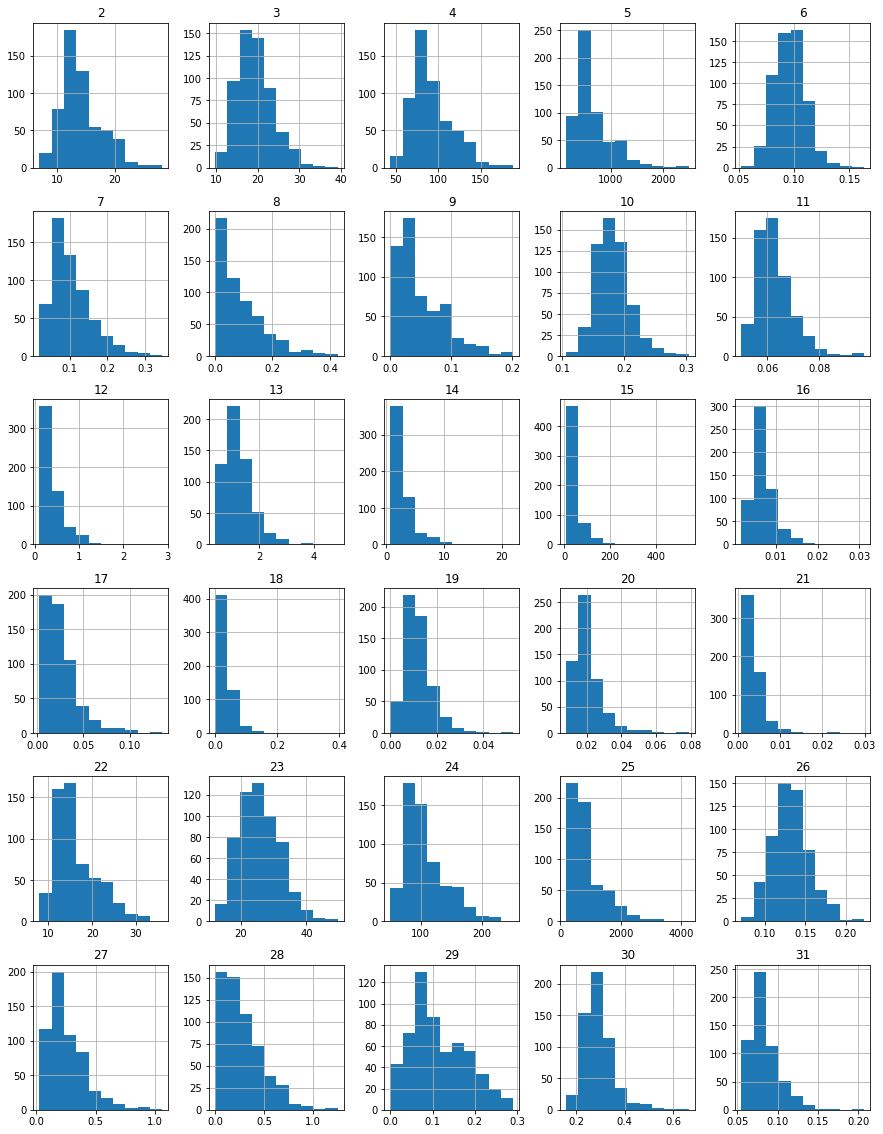

In [12]:
dataset.hist(figsize=(15,20))

In [13]:
feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension',
                'radius se', 'texture se', 'perimeter se', 'area se', 'smoothness se', 'compactness se', 'concavity se', 'concave points se', 'symmetry se', 'fractal dimension se',
                'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [14]:
feature_names = np.array(feature_names)

In [15]:
data = dataset.drop([1], axis=1).to_numpy()

In [16]:
target = dataset[1]
target = target.replace('M', 0)
target = target.replace('B', 1)
target = target.to_numpy()
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

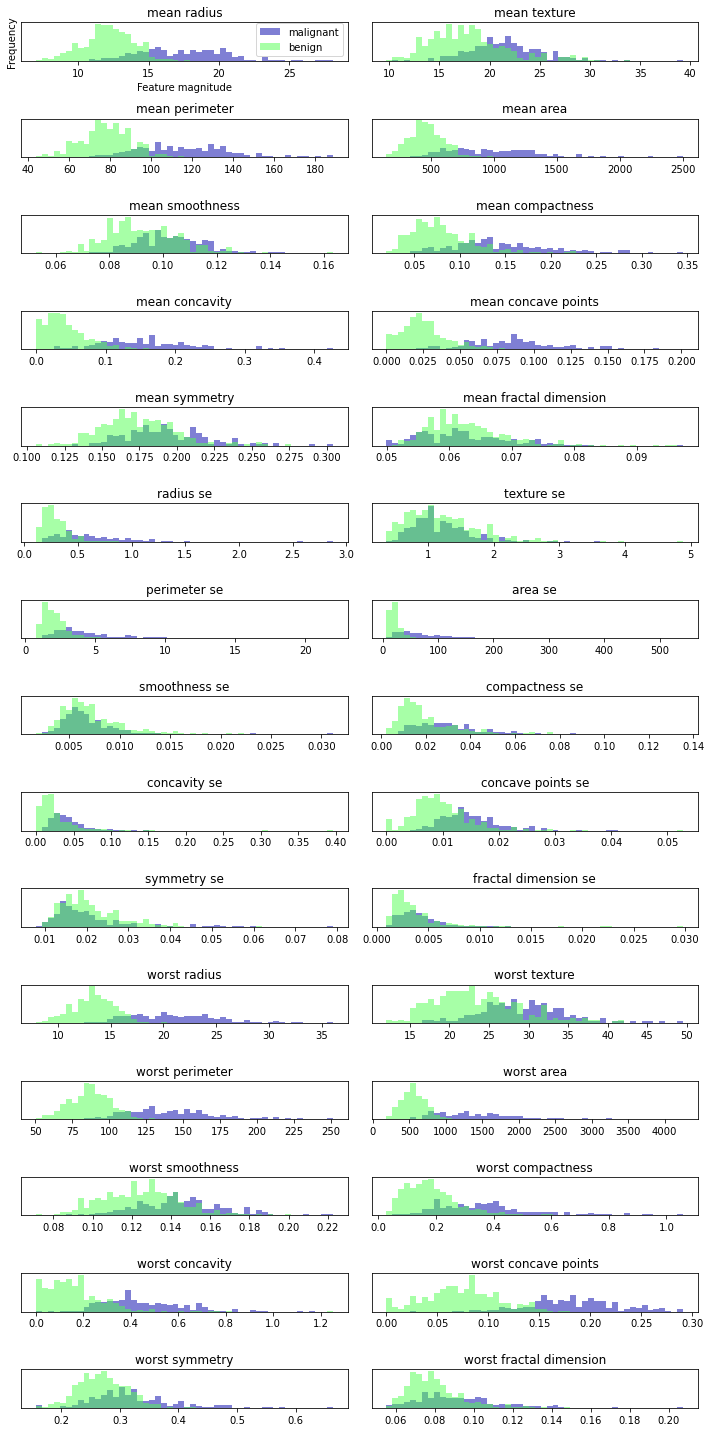

In [17]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = data[target == 0]
benign = data[target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mgl.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mgl.cm3(2), alpha=.5)
    ax[i].set_title(feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

<h3> PCA</h3>
<p style="font-size:18px">Before I break down the main components, I am going to scale the data with a Standard Scaler so that each feature has a uniform variance.</p>

In [18]:
# Create X and y variable
X=(dataset.drop([1], axis=1)).to_numpy()
y=dataset[1]

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
X_scaled = scaler.transform(X)

In [22]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [23]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [24]:
target_names = np.array(['malignant', 'benign'])

Text(0, 0.5, 'Second principal component')

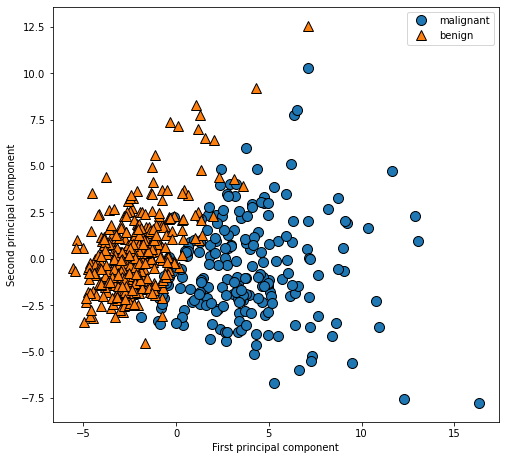

In [25]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mgl.discrete_scatter(X_pca[:, 0], X_pca[:, 1], target)
plt.legend(target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

<p style="font-size:18px">For this diagram shown here, we plotted the first against the second main component and then colored the points according to categories.You can see that the categories are very well separated in this two-dimensional space. We have a pretty good distinction between the two categories.</p>

In [26]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [27]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


<p style="font-size:18px">We see that all coefficients in the first principal component have the same sign. This means that basically all features correlate with one another. If one measured value is high, the rest are likely high too.<br>
The second main component has different signs, and all 30 features flow into both main components. It is this mixture of all features that makes the interpretation of the axes in the heat map below.</p>

Text(0, 0.5, 'Principal components')

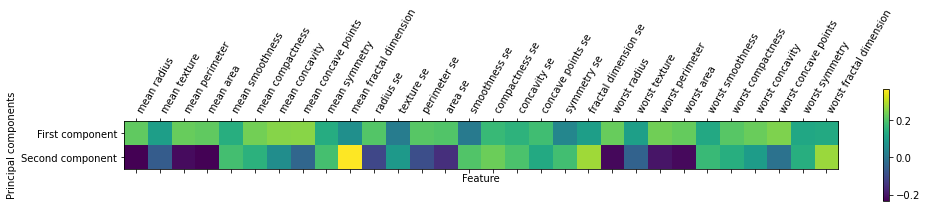

In [28]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),
           feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

<h3>Support Vector Machines</h3>

In [29]:
# Create X and y variable
X=(dataset.drop([1], axis=1)).to_numpy()
y=dataset[1]

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
# create object
svm = SVC()

In [32]:
# train data
svm.fit(X_train, y_train)

SVC()

In [33]:
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Text(0, 0.5, 'Feature magnitude')

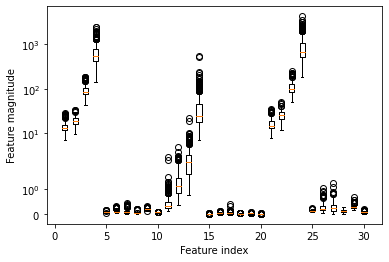

In [34]:
# Plotting without scaling
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

<h3>MinMaxScaler</h3>

In [35]:
# create object
scaler=MinMaxScaler()

In [36]:
scaler.fit(X_train)

MinMaxScaler()

<h3>Scaling data</h3>

In [37]:
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler()

In [38]:
X_train_scaled_transform=scaler.transform(X_train)
print("transformed shape: {}".format(X_train_scaled_transform.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled_transform.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled_transform.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling:
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [39]:
X_test_scaled_transform=scaler.transform(X_test)

In [40]:
svc = SVC()
svc.fit(X_train_scaled_transform, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled_transform, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled_transform, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [41]:
# add instruments for regulating 
svc = SVC(C=10, gamma=0.1)
svc.fit(X_train_scaled_transform, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled_transform, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled_transform, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.965


<p style="font-size:18px">Accuracy of the test almost 97%!</p>

<h3>Plotting scaled data</h3>

Text(0, 0.5, 'Feature magnitude')

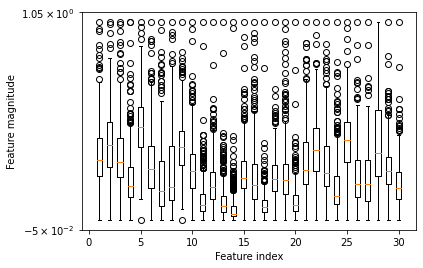

In [42]:
plt.boxplot(X_train_scaled_transform, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

<h3>Uncertainty estimates from classifiers</h3>

In [43]:
print("X_test_scaled_transform.shape:", X_test_scaled_transform.shape)
print("Decision function shape:",
      svm.decision_function(X_test_scaled_transform).shape)

X_test_scaled_transform.shape: (143, 30)
Decision function shape: (143,)


<h4>The Decision Function</h4>

In [44]:
# show the first few entries of decision_function
print("Decision function:", svm.decision_function(X_test_scaled_transform)[:100])

Decision function: [-1.04838666 -1.04832918 -1.0485102  -1.04851426 -1.04837723 -1.04820671
 -1.04824499 -1.04822759 -1.04786368 -1.04813607 -1.04857253 -1.04851066
 -1.04801598 -1.04879292 -1.04856533 -1.04869472 -1.04799787 -1.04927623
 -1.04912122 -1.04936261 -1.04825076 -1.04872895 -1.04844647 -1.04824855
 -1.04945957 -1.04831128 -1.04821393 -1.04839379 -1.0484303  -1.04903186
 -1.04840353 -1.04937556 -1.04837704 -1.0486971  -1.04813104 -1.04828985
 -1.04841074 -1.04911894 -1.04858515 -1.04854682 -1.04852563 -1.04803098
 -1.04866806 -1.04813323 -1.0483879  -1.04949237 -1.04802682 -1.04844172
 -1.04824353 -1.0484604  -1.04904407 -1.04853315 -1.0490183  -1.04823323
 -1.04830347 -1.04824154 -1.04814477 -1.04819479 -1.04824727 -1.04952805
 -1.04839165 -1.04872682 -1.04823723 -1.04836606 -1.04889196 -1.04819871
 -1.04954282 -1.04872941 -1.04927385 -1.04799943 -1.04854098 -1.04868835
 -1.04824456 -1.04849711 -1.04907222 -1.04831734 -1.04801745 -1.04835334
 -1.04826425 -1.04799608 -1.0487

In [45]:
print("Thresholded decision function:\n",
      svm.decision_function(X_test_scaled_transform) > 0)
print("Predictions:\n", svm.predict(X_test_scaled_transform))

Thresholded decision function:
 [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
Predictions:
 ['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' '

In [46]:
# make the boolean True/False into 0 and 1
greater_zero = (svm.decision_function(X_test_scaled_transform) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = svm.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == svm.predict(X_test_scaled_transform)))

pred is equal to predictions: True


In [47]:
decision_function = svm.decision_function(X_test_scaled_transform)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -1.05 maximum: -1.05


<h3>Conclusion:</h3>
<p style="font-size:18px">Using the Support Vector Machines algorithm, I got pretty good results from the model. Using MinMaxScaler made the model even better and achieved an accuracy of testdataset 97%.</p>